In [1]:
# install via conda. First create env. 
# conda install scirpy

## Analysis step: 
# https://www.10xgenomics.com/analysis-guides/demultiplexing-and-analyzing-5%E2%80%99-immune-profiling-libraries-pooled-with-hashtags



In [2]:
import tarfile
import warnings
from glob import glob

import anndata
import matplotlib.pyplot as plt
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

/opt/conda/envs/merged_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

# Replace this with your actual path
h5_file_path = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5" 
vdj_file_path = "/workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_vdj_t_filtered_contig_annotations.csv"

# Load data files into an AnnData object (change paths to your actual file locations)
# adata = ir.io.read_10x_vdj(vdj_file_path)

# Alternatively, load expression data (if you want to integrate expression and clonotype data)
# adata_expression = sc.read_10x_h5(h5_file_path)


# Load the TCR data
adata_tcr = ir.io.read_10x_vdj(vdj_file_path)

# Load the associated transcriptomics data
adata = sc.read_10x_h5(h5_file_path)
adata.var_names_make_unique()

reading /workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5


/opt/conda/envs/merged_env/lib/python3.11/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


 (0:00:02)


/opt/conda/envs/merged_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/conda/envs/merged_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
adata_tcr.shape

(7553, 0)

In [5]:
adata.shape

(13853, 38606)

In [6]:
mdata = mu.MuData({"gex": adata, "airr": adata_tcr})

/opt/conda/envs/merged_env/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/opt/conda/envs/merged_env/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [7]:
sc.pp.log1p(mdata["gex"])
sc.pp.pca(mdata["gex"], svd_solver="arpack")
sc.pp.neighbors(mdata["gex"])
sc.tl.umap(mdata["gex"])

computing PCA
    with n_comps=50
    finished (0:00:27)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:26)
computing UMAP
    finished (0:00:06)


In [8]:
ir.pp.index_chains(mdata)
ir.tl.chain_qc(mdata)

Filtering chains...
Indexing VJ chains...
Indexing VDJ chains...
build result array
Stored result in `mdata.obs["airr:receptor_type"]`.
Stored result in `mdata.obs["airr:receptor_subtype"]`.
Stored result in `mdata.obs["airr:chain_pairing"]`.


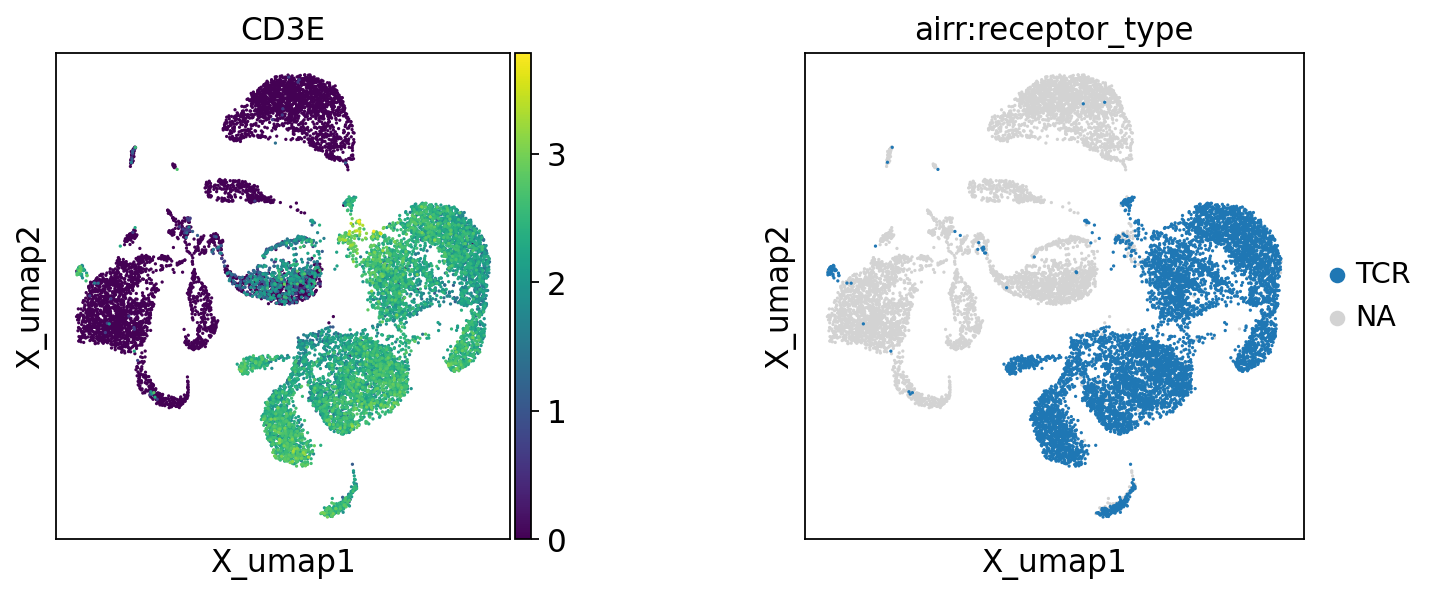

In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={"wspace": 0.5})
mu.pl.embedding(mdata, basis="gex:umap", color=["CD3E"], ax=ax0, show=False)
mu.pl.embedding(mdata, basis="gex:umap", color=["airr:receptor_type"], ax=ax1)

In [10]:
# Check the shape of the expression data
print("Shape of expression data:", adata_expression.X.shape)

# Check the type of X
print("Type of X:", type(adata_expression.X))

# If X is a sparse matrix, convert to dense and display the first 5 cells and 5 genes
if hasattr(adata_expression.X, 'toarray'):
    X_dense = adata_expression.X.toarray()
    print("Dense array (first 5 cells and 5 genes):")
    print(X_dense[:5, :5])
else:
    print("X is already a dense array:")
    print(adata_expression.X[:5, :5])

# Check observation and variable metadata
print("Observation metadata (obs):")
print(adata_expression.obs.head())

print("Variable metadata (var):")
print(adata_expression.var.head())


NameError: name 'adata_expression' is not defined

In [27]:
import scanpy as sc

# Load the expression data into an AnnData object
adata_expression = sc.read_10x_h5(h5_file_path)

# Check the contents of the AnnData object
print(adata_expression)
print(adata_expression.obs.head())  # Check cell metadata
print(adata_expression.var.head())   # Check gene metadata


reading /workspaces/ATAi_advance_notebooks/test_data/TCR_BCR_seq/10x_gen_examples/10k_5p_Human_diseased_PBMC_ALL_Fresh/10k_5p_Human_diseased_PBMC_ALL_Fresh_count_filtered_feature_bc_matrix.h5
 (0:00:01)


/opt/conda/envs/merged_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 13853 × 38606
    var: 'gene_ids', 'feature_types', 'genome'
Empty DataFrame
Columns: []
Index: [AAACCAAAGAACAGAC-1, AAACCAAAGCAAGATA-1, AAACCAAAGCTGGTTA-1, AAACCAGCACCTAACG-1, AAACCAGCACGCGTTA-1]
                        gene_ids    feature_types  genome
DDX11L2          ENSG00000290825  Gene Expression  GRCh38
MIR1302-2HG      ENSG00000243485  Gene Expression  GRCh38
FAM138A          ENSG00000237613  Gene Expression  GRCh38
ENSG00000290826  ENSG00000290826  Gene Expression  GRCh38
OR4F5            ENSG00000186092  Gene Expression  GRCh38


/opt/conda/envs/merged_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [28]:
# Check if the matrix is sparse and view some values
print("First 5 cells and 5 genes (dense array):")
dense_array = adata_expression.X.A  # Convert to dense if it's small enough
print(dense_array[:5, :5])  # First 5 cells and 5 genes


First 5 cells and 5 genes (dense array):
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [29]:
# Merge expression and VDJ data if both are available
adata.obs = adata.obs.join(adata_expression.obs)


In [33]:
# View the columns in the observation metadata
print(adata.obs.columns)

# View the first few rows of observation metadata
print(adata.obs.head())


Index([], dtype='object')
Empty DataFrame
Columns: []
Index: [AAACCAAAGAACAGAC-1, AAACCAAAGCAAGATA-1, AAACCAAAGCTGGTTA-1, AAACCAGCACCTAACG-1, AAACCAGCACGCGTTA-1]


In [34]:
# Check the keys in the obsm attribute
print(adata.obsm.keys())

# View the contents of the relevant key if it exists
if 'airr' in adata.obsm.keys():
    print(adata.obsm['airr'])


KeysView(AxisArrays with keys: airr)
[[{c_call: 'TRBC2', cdr1: 'GACTTTCAGGCCACAACT', cdr1_aa: ..., ...}, ...], ...]
